**IMPORTING** **LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

DROP COLUMN ID

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

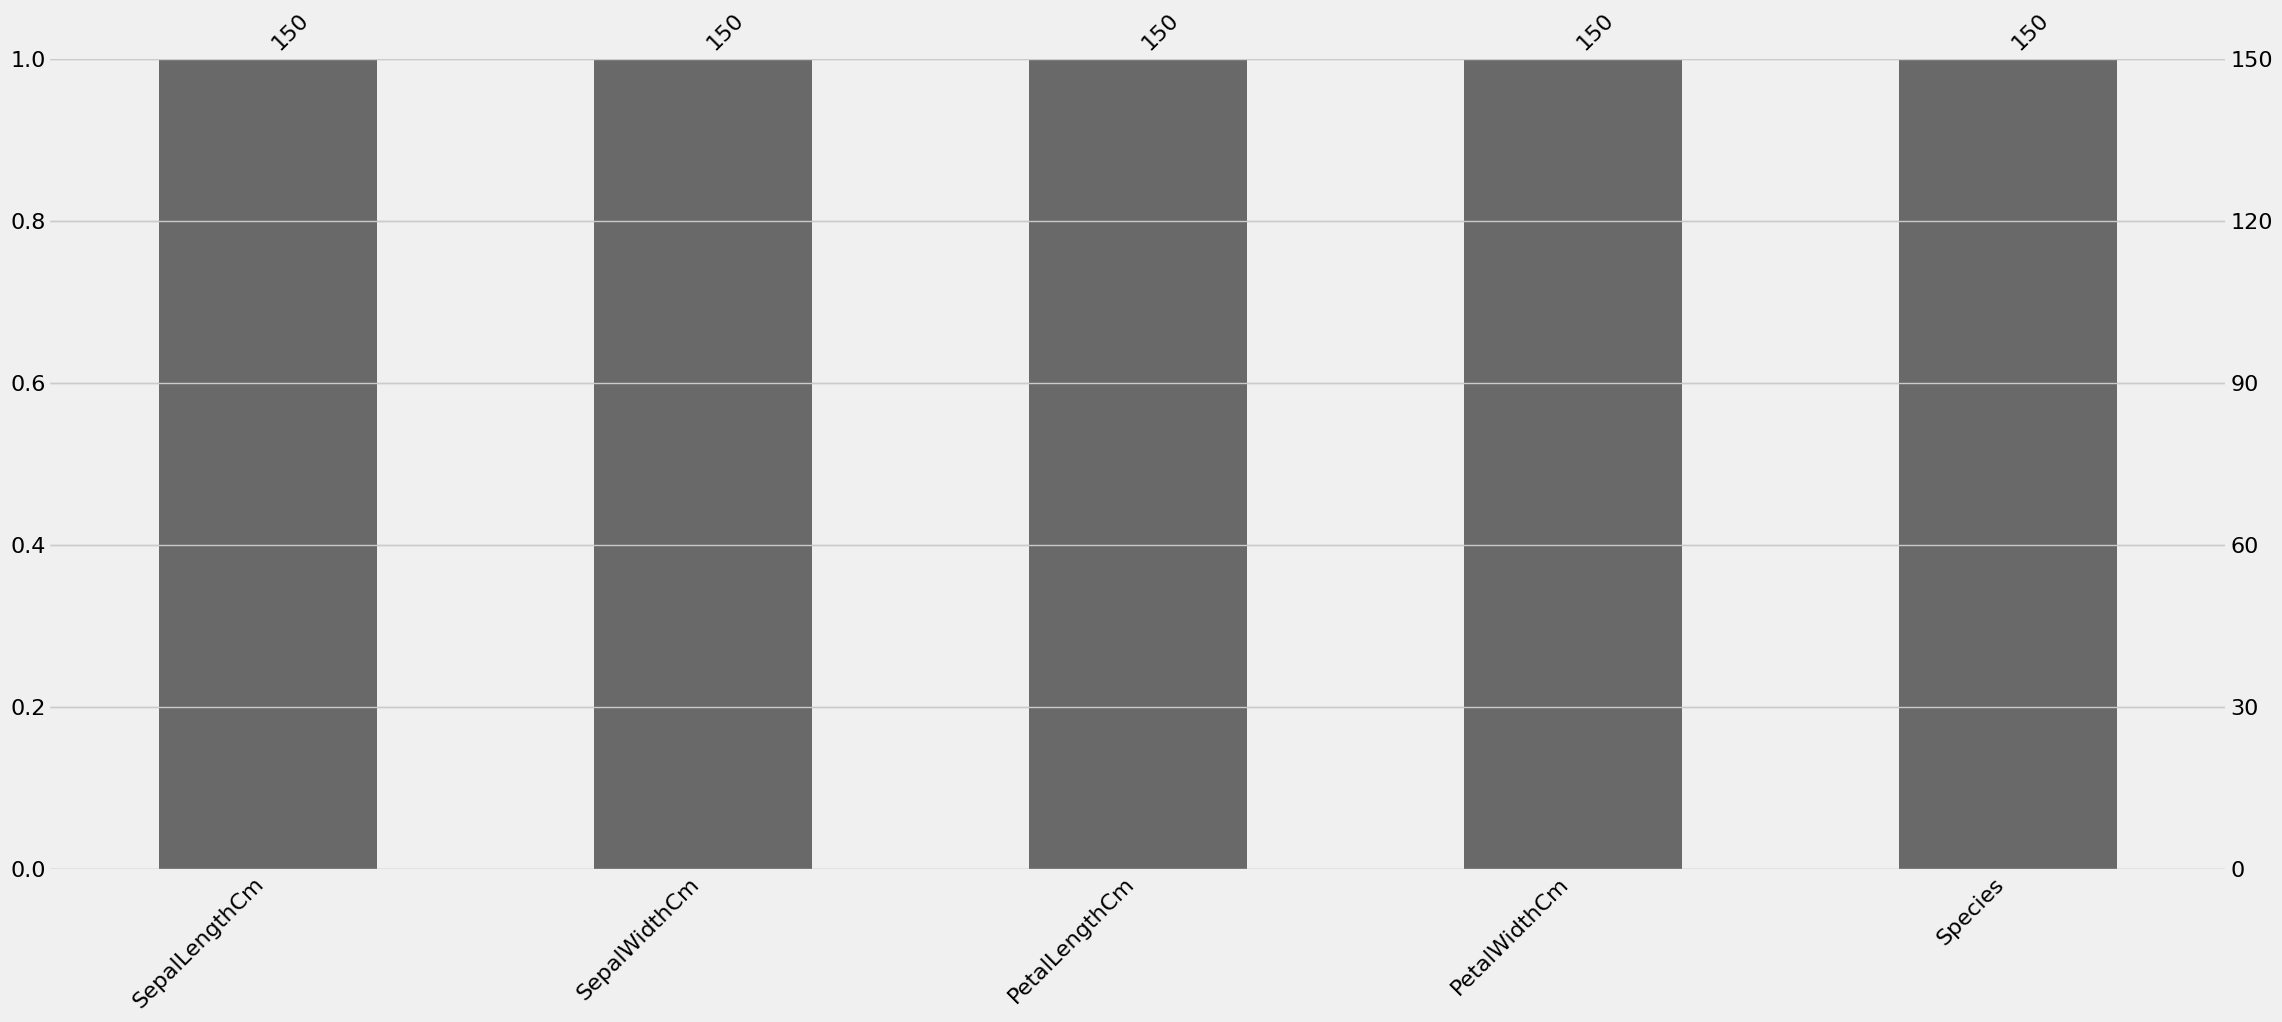

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.drop_duplicates(inplace=True)

**EDA**

1. Relationship between species and sepal length

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

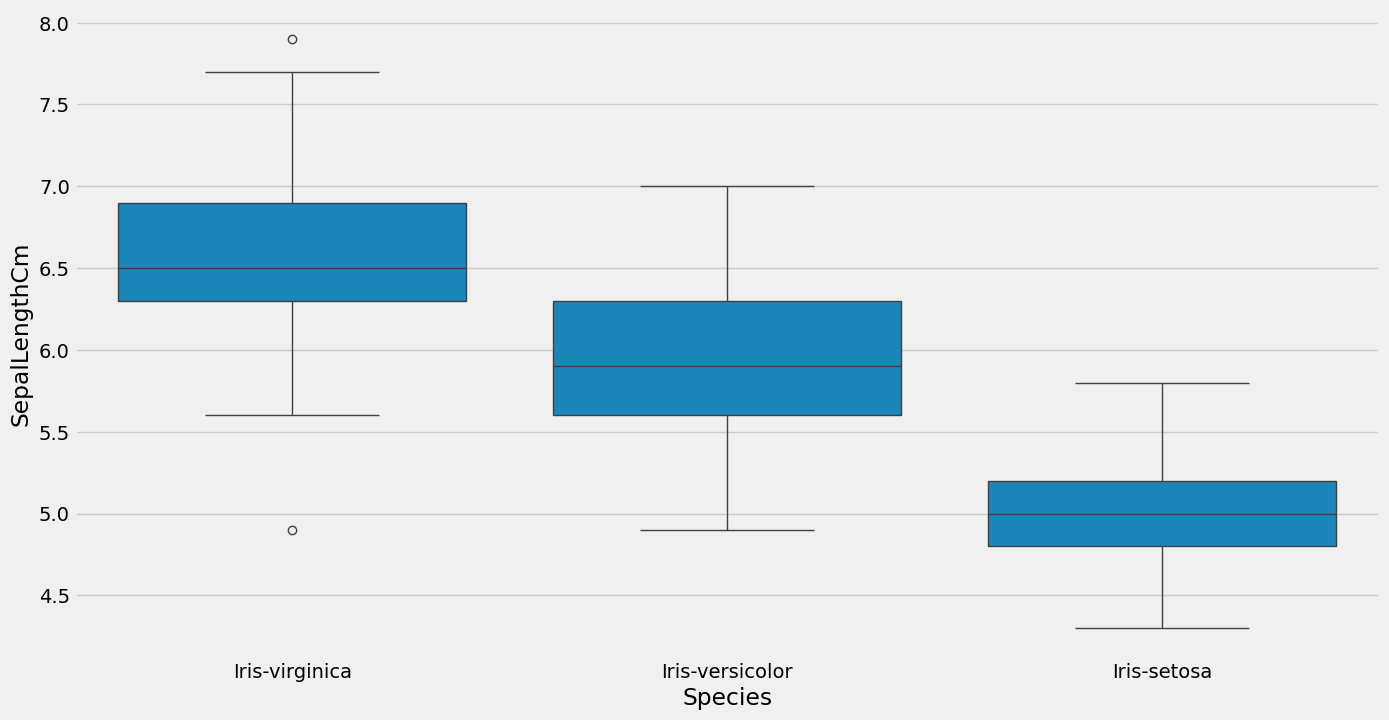

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

2. Relationship between sepal width and sepal length

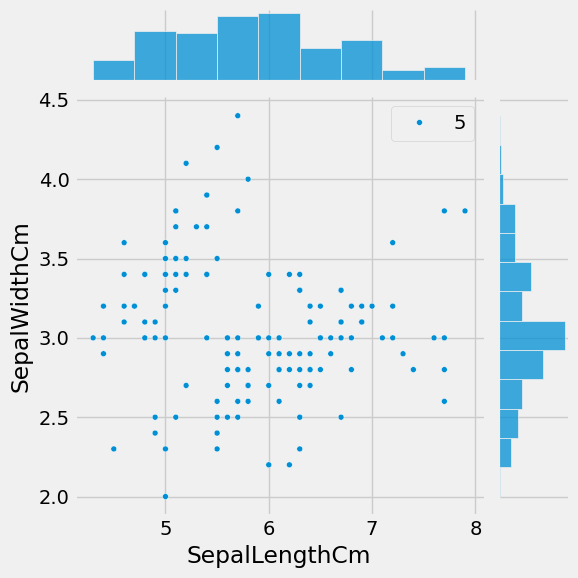

In [ ]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

3. Boxplot

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

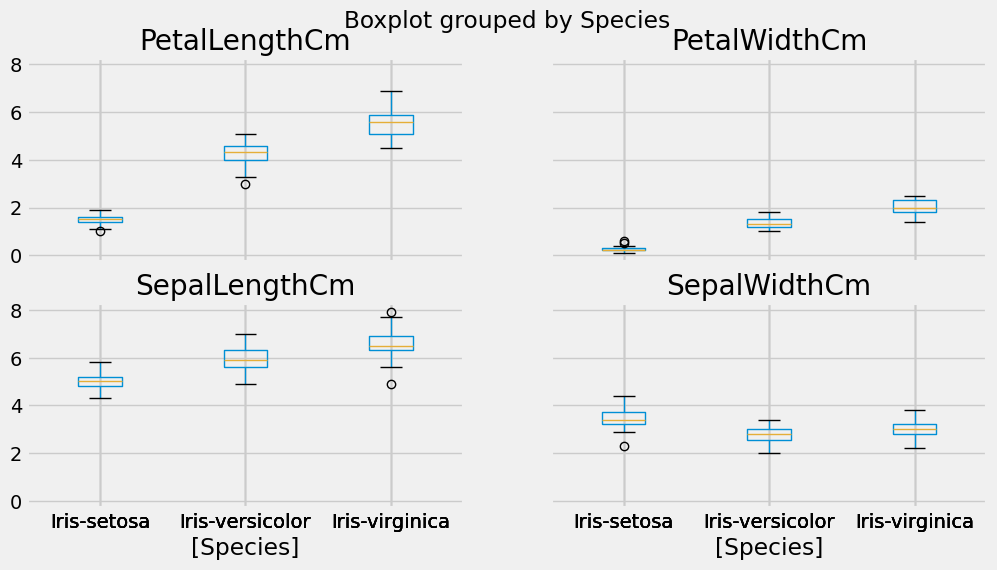

In [ ]:
df.boxplot(by="Species", figsize=(12, 6))

4. Andrews_curves

<Axes: >

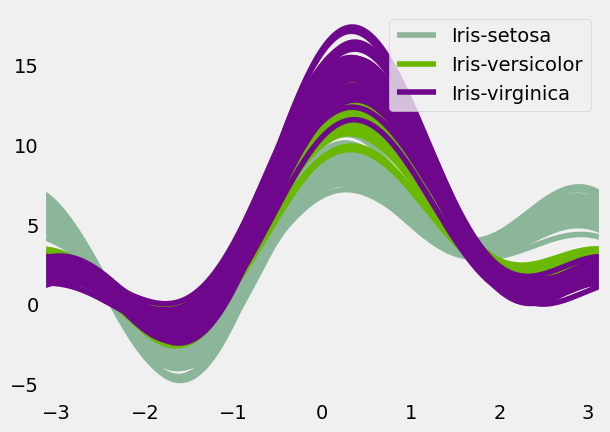

In [ ]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

5. Relationship between species and sepal width

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

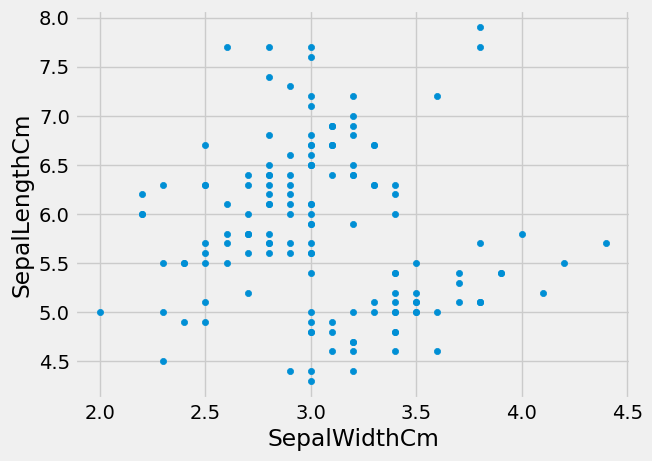

In [ ]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')


**TRAINING AND TESTING**

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes

In [ ]:
y = to_categorical(df.Species)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 98ms/step - loss: 0.9924 - accuracy: 0.4804 - val_loss: 0.9385 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 14ms/step - loss: 0.9331 - accuracy: 0.3333 - val_loss: 0.8935 - val_accuracy: 0.5778
Epoch 3/45
4/4 [==============================] - 0s 15ms/step - loss: 0.8905 - accuracy: 0.6373 - val_loss: 0.8479 - val_accuracy: 0.6667
Epoch 4/45
4/4 [==============================] - 0s 21ms/step - loss: 0.8491 - accuracy: 0.6569 - val_loss: 0.8074 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 15ms/step - loss: 0.8091 - accuracy: 0.6569 - val_loss: 0.7715 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 15ms/step - loss: 0.7758 - accuracy: 0.6961 - val_loss: 0.7427 - val_accuracy: 0.8222
Epoch 7/45
4/4 [==============================] - 0s 19ms/step - loss: 0.7474 - accuracy: 0.9216 - val_loss: 0.7259 - val_accuracy: 0.9778
Epoch 8/45
4/4 [===========

In [ ]:
model.evaluate(X_test,y_test)


2/2 [==============================] - 0s 9ms/step - loss: 0.3474 - accuracy: 0.9111


[0.3474125266075134, 0.9111111164093018]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 85ms/step
[[0.00293966 0.27652928 0.7205311 ]
 [0.00237672 0.25678807 0.74083525]
 [0.0615614  0.6070272  0.3314114 ]
 [0.03521708 0.53882724 0.42595568]
 [0.93335617 0.06302378 0.00362004]
 [0.0348055  0.5997923  0.36540213]
 [0.00257751 0.20806368 0.78935885]
 [0.00290053 0.22418445 0.772915  ]
 [0.93108225 0.06530566 0.00361202]
 [0.00632644 0.3477578  0.64591575]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.4803921580314636,
 0.3333333432674408,
 0.6372548937797546,
 0.656862735748291,
 0.656862735748291,
 0.6960784196853638,
 0.9215686321258545,
 0.9215686321258545,
 0.9117646813392639,
 0.9117646813392639,
 0.9509803652763367,
 0.7941176295280457,
 0.7352941036224365,
 0.7549019455909729,
 0.8333333134651184,
 0.9019607901573181,
 0.8627451062202454,
 0.8627451062202454,
 0.8725489974021912,
 0.8725489974021912,
 0.9313725233078003,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9607843160629272,
 0.9607843160629272,
 0.9509803652763367,
 0.9215686321258545,
 0.9509803652763367,
 0.970588207244873,
 0.9607843160629272,
 0.9215686321258545,
 0.9313725233078003,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9607843160629272,
 0.8921568393707275,
 0.9117646813392639,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873]

In [ ]:
history.history['val_accuracy']

[0.3333333432674408,
 0.5777778029441833,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.8222222328186035,
 0.9777777791023254,
 0.9333333373069763,
 0.9333333373069763,
 0.9777777791023254,
 0.8444444537162781,
 0.7555555701255798,
 0.7555555701255798,
 0.7777777910232544,
 0.8888888955116272,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.9111111164093018,
 1.0,
 0.9555555582046509,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.8666666746139526,
 0.8888888955116272,
 0.9555555582046509,
 0.9111111164093018,
 0.8888888955116272,
 0.8666666746139526,
 0.9111111164093018,
 0.9555555582046509,
 1.0,
 0.9777777791023254,
 0.9111111164093018,
 0.8666666746139526,
 0.8444444537162781,
 0.9111111164093018,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.9111111164093018]

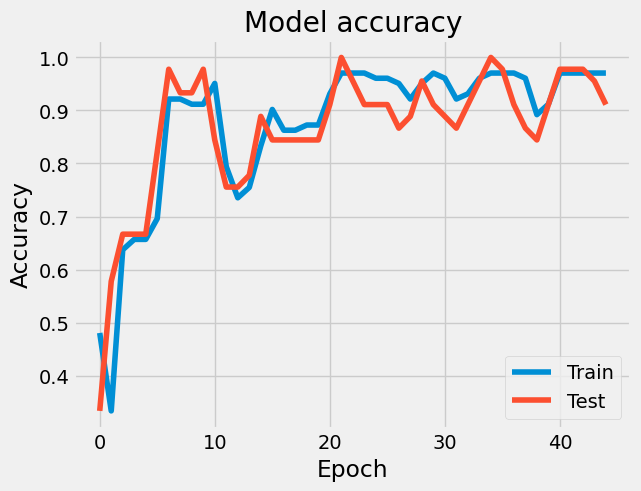

In [ ]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()